In [1]:
#CKVGG19-1EXP

2024-10-20 02:16:15.432137: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-20 02:16:15.748319: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-20 02:16:16.538710: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Found 787 images belonging to 7 classes.
Found 194 images belonging to 7 classes.
Train and Validation sets have been created.
Above data generator functions have been created.
Above data generator functions have been created.


2024-10-20 02:16:18.219789: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-10-20 02:16:18.399922: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-10-20 02:16:18.400077: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

CNN model has been created you can proceed to train you data with this model.


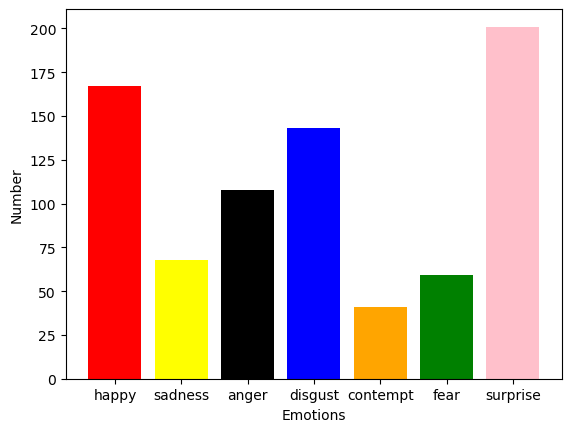

In [2]:
import tensorflow
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
from tensorflow.keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import tensorflow as tf
# Importing Deep Learning Libraries
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
from tensorflow.keras.utils import plot_model
from keras import regularizers
from tensorflow.keras.utils import plot_model
from keras.preprocessing import image

#HISTOGRAM CODE
#histogram code
import matplotlib.pyplot as plt
import os

emotions = ["happy", "sadness", "anger", "disgust", "contempt", "fear", "surprise"]

folder_path = "CK+48/train"
# Counting the number of images per emotion
counts = [len(os.listdir(os.path.join(folder_path, emotion))) for emotion in emotions]

# Plotting the bar chart
colors = ['red', 'yellow', 'black', 'blue', 'orange', 'green', 'pink']
plt.bar(emotions, height=counts, color=colors)
plt.ylabel('Number')
plt.xlabel('Emotions')
plt.savefig('hostgoarm.png')
#plt.show()


batch_size  = 64
datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_ds = datagen_train.flow_from_directory("CK+48/train",
                                               target_size = (48,48),
                                               color_mode = "rgb",
                                               batch_size=batch_size,
                                               class_mode='categorical',
                                               shuffle=True)


test_ds = datagen_val.flow_from_directory("CK+48/validation",
                                               target_size = (48,48),
                                               color_mode = "rgb",
                                               batch_size=batch_size,
                                               class_mode='categorical',
                                               shuffle=False)
print('Train and Validation sets have been created.')





# Rescale train data.
datagen_train = ImageDataGenerator(rescale = 1./255,
                                  )

# Rescale validation data.
datagen_val = ImageDataGenerator(rescale = 1./255,
                                 )

print('Above data generator functions have been created.')
# Rescale train data.
datagen_train = ImageDataGenerator(rescale = 1./255,
                                  )

# Rescale validation data.
datagen_val = ImageDataGenerator(rescale = 1./255,
                                 )

print('Above data generator functions have been created.')





#model vgg19

from keras.applications.vgg19 import VGG19
conv_base = VGG19(
    weights='imagenet',
    include_top = False,
    input_shape=(48,48,3)
)

#conv_base.summary()

model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.30))
# Second fully connected layer  
model.add(Dense(512,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.30))

model.add(Dense(7, activation='softmax'))

#model.summary()






# Visualize the model.
#plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

conv_base.trainable = False

model.compile(optimizer = Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

print('CNN model has been created you can proceed to train you data with this model.')



In [3]:

epochs = 500

history = model.fit_generator(generator=train_ds,
                                steps_per_epoch=train_ds.n//train_ds.batch_size,
                                epochs=epochs,
                                validation_data = test_ds,
                                validation_steps = test_ds.n//test_ds.batch_size,
                                
                                )
print('Your model has been trained!!')
     
    
    
    
    
    

Epoch 1/500


/tmp/ipykernel_4215/3806955214.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_ds,
2024-10-20 02:16:21.490561: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8905
2024-10-20 02:16:22.025622: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2024-10-20 02:16:22.039901: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7aafa4390000 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-10-20 02:16:22.039919: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3070 Laptop GPU, Compute Capability 8.6
2024-10-20 02:16:22.054944: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR 

12/12 [==============================] - 4s 52ms/step - loss: 1.7511 - accuracy: 0.4467 - val_loss: 1.7766 - val_accuracy: 0.6354
Epoch 2/500
12/12 [==============================] - 0s 22ms/step - loss: 0.9985 - accuracy: 0.6556 - val_loss: 1.1057 - val_accuracy: 0.6719
Epoch 3/500
12/12 [==============================] - 0s 22ms/step - loss: 0.7053 - accuracy: 0.7331 - val_loss: 0.9096 - val_accuracy: 0.6823
Epoch 4/500
12/12 [==============================] - 0s 22ms/step - loss: 0.5083 - accuracy: 0.8160 - val_loss: 0.7538 - val_accuracy: 0.7500
Epoch 5/500
12/12 [==============================] - 0s 23ms/step - loss: 0.4665 - accuracy: 0.8243 - val_loss: 0.6036 - val_accuracy: 0.7865
Epoch 6/500
12/12 [==============================] - 0s 22ms/step - loss: 0.3808 - accuracy: 0.8700 - val_loss: 0.5465 - val_accuracy: 0.8021
Epoch 7/500
12/12 [==============================] - 0s 22ms/step - loss: 0.2961 - accuracy: 0.8949 - val_loss: 0.4187 - val_accuracy: 0.8229
Epoch 8/500
12/12 

12/12 [==============================] - 0s 23ms/step - loss: 0.0262 - accuracy: 0.9896 - val_loss: 0.1831 - val_accuracy: 0.9635
Epoch 116/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0198 - accuracy: 0.9935 - val_loss: 0.1825 - val_accuracy: 0.9635
Epoch 117/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0209 - accuracy: 0.9931 - val_loss: 0.1611 - val_accuracy: 0.9740
Epoch 118/500
12/12 [==============================] - 0s 22ms/step - loss: 0.0256 - accuracy: 0.9917 - val_loss: 0.1888 - val_accuracy: 0.9688
Epoch 119/500
12/12 [==============================] - 0s 22ms/step - loss: 0.0436 - accuracy: 0.9876 - val_loss: 0.1819 - val_accuracy: 0.9635
Epoch 120/500
12/12 [==============================] - 0s 22ms/step - loss: 0.0429 - accuracy: 0.9848 - val_loss: 0.2442 - val_accuracy: 0.9583
Epoch 121/500
12/12 [==============================] - 0s 22ms/step - loss: 0.0342 - accuracy: 0.9889 - val_loss: 0.2784 - val_accuracy: 0.9583
Epoch 

Epoch 172/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0245 - accuracy: 0.9931 - val_loss: 0.1377 - val_accuracy: 0.9844
Epoch 173/500
12/12 [==============================] - 0s 22ms/step - loss: 0.0148 - accuracy: 0.9972 - val_loss: 0.1555 - val_accuracy: 0.9792
Epoch 174/500
12/12 [==============================] - 0s 22ms/step - loss: 0.0175 - accuracy: 0.9945 - val_loss: 0.1410 - val_accuracy: 0.9740
Epoch 175/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0145 - accuracy: 0.9972 - val_loss: 0.1381 - val_accuracy: 0.9792
Epoch 176/500
12/12 [==============================] - 0s 22ms/step - loss: 0.0193 - accuracy: 0.9931 - val_loss: 0.1713 - val_accuracy: 0.9635
Epoch 177/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0175 - accuracy: 0.9931 - val_loss: 0.2049 - val_accuracy: 0.9688
Epoch 178/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0224 - accuracy: 0.9945 - val_loss: 0.2293 - val_accuracy:

Epoch 229/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0109 - accuracy: 0.9972 - val_loss: 0.1632 - val_accuracy: 0.9792
Epoch 230/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0070 - accuracy: 0.9986 - val_loss: 0.1464 - val_accuracy: 0.9792
Epoch 231/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0102 - accuracy: 0.9959 - val_loss: 0.1539 - val_accuracy: 0.9792
Epoch 232/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0123 - accuracy: 0.9959 - val_loss: 0.1725 - val_accuracy: 0.9792
Epoch 233/500
12/12 [==============================] - 0s 22ms/step - loss: 0.0095 - accuracy: 0.9972 - val_loss: 0.2090 - val_accuracy: 0.9792
Epoch 234/500
12/12 [==============================] - 0s 22ms/step - loss: 0.0172 - accuracy: 0.9931 - val_loss: 0.1918 - val_accuracy: 0.9792
Epoch 235/500
12/12 [==============================] - 0s 22ms/step - loss: 0.0341 - accuracy: 0.9931 - val_loss: 0.1452 - val_accuracy:

Epoch 286/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0069 - accuracy: 0.9986 - val_loss: 0.1334 - val_accuracy: 0.9792
Epoch 287/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.1324 - val_accuracy: 0.9792
Epoch 288/500
12/12 [==============================] - 0s 24ms/step - loss: 0.0047 - accuracy: 0.9987 - val_loss: 0.1407 - val_accuracy: 0.9792
Epoch 289/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0114 - accuracy: 0.9972 - val_loss: 0.1554 - val_accuracy: 0.9792
Epoch 290/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.1489 - val_accuracy: 0.9792
Epoch 291/500
12/12 [==============================] - 0s 22ms/step - loss: 0.0080 - accuracy: 0.9972 - val_loss: 0.1415 - val_accuracy: 0.9792
Epoch 292/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0088 - accuracy: 0.9959 - val_loss: 0.1550 - val_accuracy:

Epoch 343/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0294 - accuracy: 0.9903 - val_loss: 0.3159 - val_accuracy: 0.9688
Epoch 344/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0134 - accuracy: 0.9945 - val_loss: 0.3312 - val_accuracy: 0.9688
Epoch 345/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0103 - accuracy: 0.9974 - val_loss: 0.2809 - val_accuracy: 0.9688
Epoch 346/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0170 - accuracy: 0.9931 - val_loss: 0.2094 - val_accuracy: 0.9688
Epoch 347/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0108 - accuracy: 0.9945 - val_loss: 0.2364 - val_accuracy: 0.9688
Epoch 348/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0172 - accuracy: 0.9931 - val_loss: 0.1958 - val_accuracy: 0.9740
Epoch 349/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0129 - accuracy: 0.9945 - val_loss: 0.1519 - val_accuracy:

Epoch 400/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0166 - accuracy: 0.9917 - val_loss: 0.1930 - val_accuracy: 0.9844
Epoch 401/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0150 - accuracy: 0.9959 - val_loss: 0.2155 - val_accuracy: 0.9844
Epoch 402/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0134 - accuracy: 0.9972 - val_loss: 0.1875 - val_accuracy: 0.9844
Epoch 403/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0079 - accuracy: 0.9961 - val_loss: 0.1379 - val_accuracy: 0.9792
Epoch 404/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0193 - accuracy: 0.9948 - val_loss: 0.1512 - val_accuracy: 0.9740
Epoch 405/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.1797 - val_accuracy: 0.9740
Epoch 406/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0115 - accuracy: 0.9959 - val_loss: 0.1970 - val_accuracy:

Epoch 457/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0171 - accuracy: 0.9959 - val_loss: 0.0980 - val_accuracy: 0.9844
Epoch 458/500
12/12 [==============================] - 0s 22ms/step - loss: 0.0063 - accuracy: 0.9986 - val_loss: 0.1167 - val_accuracy: 0.9844
Epoch 459/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0237 - accuracy: 0.9931 - val_loss: 0.1115 - val_accuracy: 0.9792
Epoch 460/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0105 - accuracy: 0.9948 - val_loss: 0.0924 - val_accuracy: 0.9792
Epoch 461/500
12/12 [==============================] - 0s 22ms/step - loss: 0.0176 - accuracy: 0.9917 - val_loss: 0.0556 - val_accuracy: 0.9792
Epoch 462/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0045 - accuracy: 0.9972 - val_loss: 0.0806 - val_accuracy: 0.9740
Epoch 463/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0226 - accuracy: 0.9903 - val_loss: 0.0313 - val_accuracy:

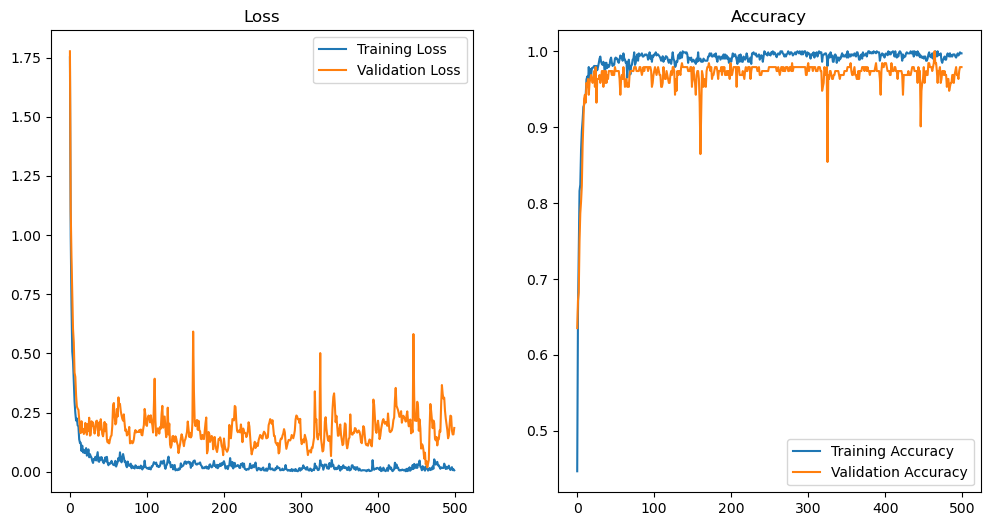

In [4]:

    # Plotting training history
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()

In [5]:
#ckresnet--1exp

Found 787 images belonging to 7 classes.
Found 194 images belonging to 7 classes.
Train and Validation sets have been created.
Above data generator functions have been created.
Above data generator functions have been created.
CNN model has been created you can proceed to train you data with this model.


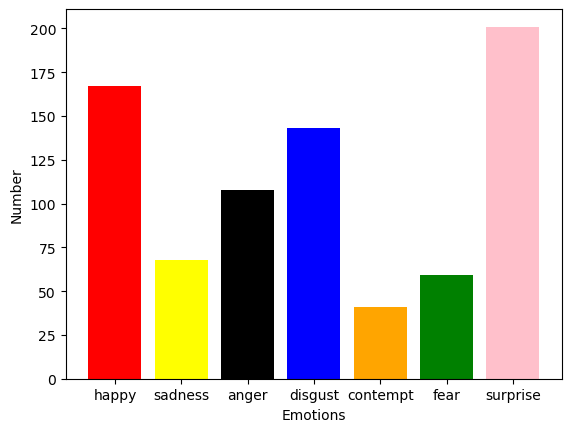

In [6]:
import tensorflow
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
from tensorflow.keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import tensorflow as tf
# Importing Deep Learning Libraries
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
from tensorflow.keras.utils import plot_model
from keras import regularizers
from tensorflow.keras.utils import plot_model
from keras.preprocessing import image

#HISTOGRAM CODE
#histogram code
import matplotlib.pyplot as plt
import os

emotions = ["happy", "sadness", "anger", "disgust", "contempt", "fear", "surprise"]

folder_path = "CK+48/train"
# Counting the number of images per emotion
counts = [len(os.listdir(os.path.join(folder_path, emotion))) for emotion in emotions]

# Plotting the bar chart
colors = ['red', 'yellow', 'black', 'blue', 'orange', 'green', 'pink']
plt.bar(emotions, height=counts, color=colors)
plt.ylabel('Number')
plt.xlabel('Emotions')
plt.savefig('hostgoarm.png')
#plt.show()


batch_size  = 64
datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_ds = datagen_train.flow_from_directory("CK+48/train",
                                               target_size = (48,48),
                                               color_mode = "rgb",
                                               batch_size=batch_size,
                                               class_mode='categorical',
                                               shuffle=True)


test_ds = datagen_val.flow_from_directory("CK+48/validation",
                                               target_size = (48,48),
                                               color_mode = "rgb",
                                               batch_size=batch_size,
                                               class_mode='categorical',
                                               shuffle=False)
print('Train and Validation sets have been created.')





# Rescale train data.
datagen_train = ImageDataGenerator(rescale = 1./255,
                                  )

# Rescale validation data.
datagen_val = ImageDataGenerator(rescale = 1./255,
                                 )

print('Above data generator functions have been created.')
# Rescale train data.
datagen_train = ImageDataGenerator(rescale = 1./255,
                                  )

# Rescale validation data.
datagen_val = ImageDataGenerator(rescale = 1./255,
                                 )

print('Above data generator functions have been created.')





#model resnet152

from keras.applications.resnet import ResNet152
conv_base = ResNet152(
    weights='imagenet',
    include_top = False,
    input_shape=(48,48,3)
)

#conv_base.summary()

model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.30))
# Second fully connected layer  
model.add(Dense(512,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.30))

model.add(Dense(7, activation='softmax'))

#model.summary()






# Visualize the model.
#plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

conv_base.trainable = False

model.compile(optimizer = Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

print('CNN model has been created you can proceed to train you data with this model.')



In [7]:

epochs = 500

history = model.fit_generator(generator=train_ds,
                                steps_per_epoch=train_ds.n//train_ds.batch_size,
                                epochs=epochs,
                                validation_data = test_ds,
                                validation_steps = test_ds.n//test_ds.batch_size,
                                
                                )
print('Your model has been trained!!')
     
    
    
    
    
    


Epoch 1/500


/tmp/ipykernel_4215/1281752000.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_ds,


12/12 [==============================] - 8s 209ms/step - loss: 1.4125 - accuracy: 0.5339 - val_loss: 5.1739 - val_accuracy: 0.4115
Epoch 2/500
12/12 [==============================] - 0s 31ms/step - loss: 0.7591 - accuracy: 0.7358 - val_loss: 2.0002 - val_accuracy: 0.6719
Epoch 3/500
12/12 [==============================] - 0s 30ms/step - loss: 0.5127 - accuracy: 0.8119 - val_loss: 1.1887 - val_accuracy: 0.7292
Epoch 4/500
12/12 [==============================] - 0s 30ms/step - loss: 0.3773 - accuracy: 0.8741 - val_loss: 1.3299 - val_accuracy: 0.6979
Epoch 5/500
12/12 [==============================] - 0s 30ms/step - loss: 0.2877 - accuracy: 0.8935 - val_loss: 0.9858 - val_accuracy: 0.7344
Epoch 6/500
12/12 [==============================] - 0s 30ms/step - loss: 0.2739 - accuracy: 0.9115 - val_loss: 0.7572 - val_accuracy: 0.7708
Epoch 7/500
12/12 [==============================] - 0s 30ms/step - loss: 0.1911 - accuracy: 0.9350 - val_loss: 0.5290 - val_accuracy: 0.8177
Epoch 8/500
12/12

12/12 [==============================] - 0s 30ms/step - loss: 0.0699 - accuracy: 0.9765 - val_loss: 1.0936 - val_accuracy: 0.8073
Epoch 116/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0334 - accuracy: 0.9889 - val_loss: 0.3943 - val_accuracy: 0.9479
Epoch 117/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0200 - accuracy: 0.9931 - val_loss: 0.3943 - val_accuracy: 0.9427
Epoch 118/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0257 - accuracy: 0.9959 - val_loss: 0.4110 - val_accuracy: 0.9062
Epoch 119/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0261 - accuracy: 0.9876 - val_loss: 0.6395 - val_accuracy: 0.8906
Epoch 120/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0398 - accuracy: 0.9876 - val_loss: 0.3214 - val_accuracy: 0.9271
Epoch 121/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0142 - accuracy: 0.9931 - val_loss: 0.3643 - val_accuracy: 0.9427
Epoch 

Epoch 172/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0069 - accuracy: 0.9972 - val_loss: 0.3960 - val_accuracy: 0.9271
Epoch 173/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0053 - accuracy: 0.9986 - val_loss: 0.2954 - val_accuracy: 0.9635
Epoch 174/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0052 - accuracy: 0.9986 - val_loss: 0.2323 - val_accuracy: 0.9792
Epoch 175/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 0.2178 - val_accuracy: 0.9844
Epoch 176/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0031 - accuracy: 0.9986 - val_loss: 0.2226 - val_accuracy: 0.9792
Epoch 177/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0252 - accuracy: 0.9917 - val_loss: 0.4909 - val_accuracy: 0.9427
Epoch 178/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0563 - accuracy: 0.9862 - val_loss: 0.3781 - val_accuracy:

Epoch 229/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0367 - accuracy: 0.9876 - val_loss: 0.2461 - val_accuracy: 0.9688
Epoch 230/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0062 - accuracy: 0.9972 - val_loss: 0.3847 - val_accuracy: 0.9583
Epoch 231/500
12/12 [==============================] - 0s 31ms/step - loss: 0.0297 - accuracy: 0.9931 - val_loss: 0.4405 - val_accuracy: 0.9531
Epoch 232/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0141 - accuracy: 0.9931 - val_loss: 0.5498 - val_accuracy: 0.9635
Epoch 233/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0037 - accuracy: 0.9986 - val_loss: 0.4951 - val_accuracy: 0.9635
Epoch 234/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0051 - accuracy: 0.9959 - val_loss: 0.4002 - val_accuracy: 0.9635
Epoch 235/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0036 - accuracy: 0.9986 - val_loss: 0.4073 - val_accuracy:

Epoch 286/500
12/12 [==============================] - 0s 30ms/step - loss: 4.5235e-04 - accuracy: 1.0000 - val_loss: 0.4762 - val_accuracy: 0.9844
Epoch 287/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0017 - accuracy: 0.9986 - val_loss: 0.4848 - val_accuracy: 0.9844
Epoch 288/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0063 - accuracy: 0.9986 - val_loss: 0.4582 - val_accuracy: 0.9688
Epoch 289/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0037 - accuracy: 0.9986 - val_loss: 0.4160 - val_accuracy: 0.9583
Epoch 290/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0060 - accuracy: 0.9986 - val_loss: 0.4001 - val_accuracy: 0.9740
Epoch 291/500
12/12 [==============================] - 0s 30ms/step - loss: 8.3740e-04 - accuracy: 1.0000 - val_loss: 0.3955 - val_accuracy: 0.9740
Epoch 292/500
12/12 [==============================] - 0s 30ms/step - loss: 6.5744e-04 - accuracy: 1.0000 - val_loss: 0.3946 - v

Epoch 343/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0115 - accuracy: 0.9972 - val_loss: 0.3532 - val_accuracy: 0.9844
Epoch 344/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0070 - accuracy: 0.9972 - val_loss: 0.3236 - val_accuracy: 0.9792
Epoch 345/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0320 - accuracy: 0.9876 - val_loss: 0.3294 - val_accuracy: 0.9740
Epoch 346/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0100 - accuracy: 0.9959 - val_loss: 0.3980 - val_accuracy: 0.9688
Epoch 347/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0248 - accuracy: 0.9931 - val_loss: 0.2911 - val_accuracy: 0.9844
Epoch 348/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0112 - accuracy: 0.9945 - val_loss: 0.2477 - val_accuracy: 0.9635
Epoch 349/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0069 - accuracy: 0.9972 - val_loss: 0.4106 - val_accuracy:

Epoch 400/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0099 - accuracy: 0.9959 - val_loss: 0.2435 - val_accuracy: 0.9792
Epoch 401/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0100 - accuracy: 0.9945 - val_loss: 0.1868 - val_accuracy: 0.9792
Epoch 402/500
12/12 [==============================] - 0s 29ms/step - loss: 9.9150e-04 - accuracy: 1.0000 - val_loss: 0.2229 - val_accuracy: 0.9688
Epoch 403/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0151 - accuracy: 0.9972 - val_loss: 0.2308 - val_accuracy: 0.9688
Epoch 404/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0071 - accuracy: 0.9972 - val_loss: 0.2260 - val_accuracy: 0.9792
Epoch 405/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0054 - accuracy: 0.9972 - val_loss: 0.1894 - val_accuracy: 0.9635
Epoch 406/500
12/12 [==============================] - 0s 31ms/step - loss: 0.0115 - accuracy: 0.9959 - val_loss: 0.2625 - val_accur

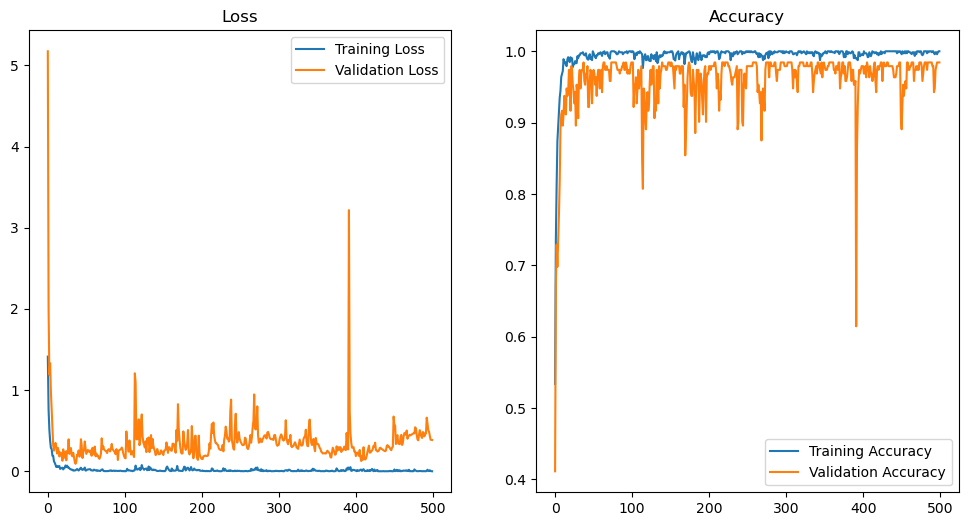

In [8]:
    # Plotting training history
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()


In [9]:
#JAFFEVGG19---1EXP

Found 168 images belonging to 7 classes.
Found 45 images belonging to 7 classes.
Train and Validation sets have been created.


/home/rajesh/anaconda3/lib/python3.11/site-packages/keras/src/preprocessing/image.py:202: UserWarning: Using ".tiff" files with multiple bands will cause distortion. Please verify your output.
  warnings.warn(


CNN model has been created you can proceed to train you data with this model.


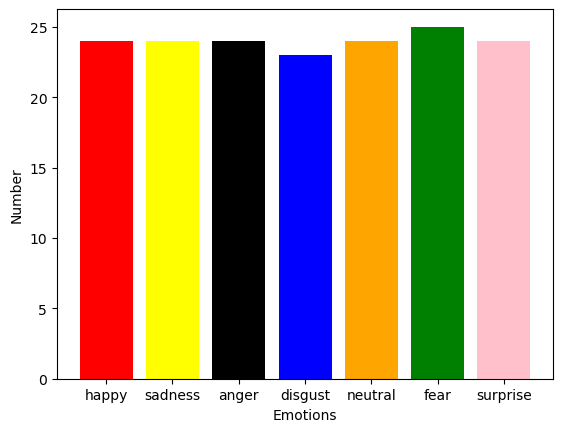

In [10]:
import tensorflow
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
from tensorflow.keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import tensorflow as tf
# Importing Deep Learning Libraries
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model
from keras import regularizers
from keras.preprocessing import image

#HISTOGRAM CODE
#histogram code
import matplotlib.pyplot as plt
import os

emotions = ["happy", "sadness", "anger", "disgust", "neutral", "fear", "surprise"]

folder_path = "Jaffetrainvalidation/train"
# Counting the number of images per emotion
counts = [len(os.listdir(os.path.join(folder_path, emotion))) for emotion in emotions]

# Plotting the bar chart
colors = ['red', 'yellow', 'black', 'blue', 'orange', 'green', 'pink']
plt.bar(emotions, height=counts, color=colors)
plt.ylabel('Number')
plt.xlabel('Emotions')


#plt.savefig('hostgoarm.png')
#plt.show()


# Data generators
batch_size = 64

# Data augmentation for training set
datagen_train = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Normalization for validation set (no augmentation)
datagen_val = ImageDataGenerator(rescale=1./255)



train_ds = datagen_train.flow_from_directory("Jaffetrainvalidation/train",
                                             target_size=(256, 256),
                                             color_mode="rgb",
                                             batch_size=batch_size,
                                             class_mode='categorical',
                                             shuffle=True)

test_ds = datagen_val.flow_from_directory("Jaffetrainvalidation/validation",
                                         target_size=(256, 256),
                                         color_mode="rgb",
                                         batch_size=batch_size,
                                         class_mode='categorical',
                                         shuffle=False)
print('Train and Validation sets have been created.')


#model vgg19

from keras.applications.vgg19 import VGG19
conv_base = VGG19(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

#conv_base.summary()

model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.30))
# Second fully connected layer  
model.add(Dense(512,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.30))

model.add(Dense(7, activation='softmax'))

# model.summary()
# Visualize the model.
#plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

conv_base.trainable = False

model.compile(optimizer = Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

print('CNN model has been created you can proceed to train you data with this model.')



In [11]:



# Training the model
epochs = 500

history = model.fit(x=train_ds,
                    epochs=epochs,
                    validation_data=test_ds)

# Print training history
print(history.history)



Epoch 1/500


2024-10-20 02:22:11.372676: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.37GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-10-20 02:22:11.390480: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.02GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-10-20 02:22:11.491927: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.02GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-10-20 02:22:11.491961: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU

3/3 [==============================] - 15s 4s/step - loss: 2.9872 - accuracy: 0.1369 - val_loss: 3.7541 - val_accuracy: 0.1333
Epoch 2/500
3/3 [==============================] - 2s 610ms/step - loss: 2.1724 - accuracy: 0.2798 - val_loss: 3.6956 - val_accuracy: 0.2000
Epoch 3/500
3/3 [==============================] - 2s 453ms/step - loss: 2.0173 - accuracy: 0.3452 - val_loss: 4.3663 - val_accuracy: 0.2000
Epoch 4/500
3/3 [==============================] - 2s 454ms/step - loss: 1.9947 - accuracy: 0.3512 - val_loss: 5.5526 - val_accuracy: 0.1556
Epoch 5/500
3/3 [==============================] - 2s 450ms/step - loss: 1.8543 - accuracy: 0.3690 - val_loss: 6.7209 - val_accuracy: 0.1333
Epoch 6/500
3/3 [==============================] - 2s 472ms/step - loss: 1.6252 - accuracy: 0.4048 - val_loss: 7.0613 - val_accuracy: 0.1333
Epoch 7/500
3/3 [==============================] - 2s 604ms/step - loss: 1.7303 - accuracy: 0.3929 - val_loss: 6.7314 - val_accuracy: 0.1333
Epoch 8/500
3/3 [==========

Epoch 59/500
3/3 [==============================] - 2s 595ms/step - loss: 0.3804 - accuracy: 0.8571 - val_loss: 2.4610 - val_accuracy: 0.5111
Epoch 60/500
3/3 [==============================] - 2s 457ms/step - loss: 0.3231 - accuracy: 0.8750 - val_loss: 2.2853 - val_accuracy: 0.4889
Epoch 61/500
3/3 [==============================] - 2s 478ms/step - loss: 0.3043 - accuracy: 0.8631 - val_loss: 2.2628 - val_accuracy: 0.5111
Epoch 62/500
3/3 [==============================] - 2s 477ms/step - loss: 0.3054 - accuracy: 0.8512 - val_loss: 2.3541 - val_accuracy: 0.4667
Epoch 63/500
3/3 [==============================] - 2s 452ms/step - loss: 0.3248 - accuracy: 0.8631 - val_loss: 2.3655 - val_accuracy: 0.4667
Epoch 64/500
3/3 [==============================] - 2s 483ms/step - loss: 0.2771 - accuracy: 0.9048 - val_loss: 2.2251 - val_accuracy: 0.4667
Epoch 65/500
3/3 [==============================] - 2s 619ms/step - loss: 0.3126 - accuracy: 0.8810 - val_loss: 1.9834 - val_accuracy: 0.4667
Epoch 

3/3 [==============================] - 2s 469ms/step - loss: 0.1164 - accuracy: 0.9524 - val_loss: 1.1793 - val_accuracy: 0.8222
Epoch 174/500
3/3 [==============================] - 2s 456ms/step - loss: 0.1133 - accuracy: 0.9524 - val_loss: 1.1766 - val_accuracy: 0.8222
Epoch 175/500
3/3 [==============================] - 2s 458ms/step - loss: 0.1405 - accuracy: 0.9464 - val_loss: 1.2144 - val_accuracy: 0.8000
Epoch 176/500
3/3 [==============================] - 2s 486ms/step - loss: 0.1165 - accuracy: 0.9583 - val_loss: 1.2070 - val_accuracy: 0.8222
Epoch 177/500
3/3 [==============================] - 2s 601ms/step - loss: 0.1142 - accuracy: 0.9583 - val_loss: 1.1674 - val_accuracy: 0.8444
Epoch 178/500
3/3 [==============================] - 2s 601ms/step - loss: 0.1858 - accuracy: 0.9405 - val_loss: 1.1347 - val_accuracy: 0.8444
Epoch 179/500
3/3 [==============================] - 2s 473ms/step - loss: 0.1140 - accuracy: 0.9405 - val_loss: 1.1632 - val_accuracy: 0.8222
Epoch 180/500

3/3 [==============================] - 2s 455ms/step - loss: 0.1903 - accuracy: 0.9226 - val_loss: 1.0352 - val_accuracy: 0.8889
Epoch 288/500
3/3 [==============================] - 2s 599ms/step - loss: 0.1419 - accuracy: 0.9524 - val_loss: 1.1044 - val_accuracy: 0.8889
Epoch 289/500
3/3 [==============================] - 2s 599ms/step - loss: 0.0723 - accuracy: 0.9762 - val_loss: 1.1999 - val_accuracy: 0.8222
Epoch 290/500
3/3 [==============================] - 2s 453ms/step - loss: 0.1121 - accuracy: 0.9583 - val_loss: 1.3466 - val_accuracy: 0.8222
Epoch 291/500
3/3 [==============================] - 2s 603ms/step - loss: 0.1751 - accuracy: 0.9405 - val_loss: 1.7056 - val_accuracy: 0.7778
Epoch 292/500
3/3 [==============================] - 2s 467ms/step - loss: 0.1609 - accuracy: 0.9345 - val_loss: 1.8794 - val_accuracy: 0.7333
Epoch 293/500
3/3 [==============================] - 2s 460ms/step - loss: 0.0983 - accuracy: 0.9702 - val_loss: 1.7600 - val_accuracy: 0.7556
Epoch 294/500

3/3 [==============================] - 2s 608ms/step - loss: 0.0450 - accuracy: 0.9940 - val_loss: 1.5423 - val_accuracy: 0.8444
Epoch 402/500
3/3 [==============================] - 2s 454ms/step - loss: 0.0898 - accuracy: 0.9702 - val_loss: 1.5378 - val_accuracy: 0.8444
Epoch 403/500
3/3 [==============================] - 2s 602ms/step - loss: 0.0590 - accuracy: 0.9821 - val_loss: 1.4631 - val_accuracy: 0.8667
Epoch 404/500
3/3 [==============================] - 2s 602ms/step - loss: 0.0529 - accuracy: 0.9821 - val_loss: 1.4195 - val_accuracy: 0.8667
Epoch 405/500
3/3 [==============================] - 2s 455ms/step - loss: 0.0687 - accuracy: 0.9821 - val_loss: 1.4030 - val_accuracy: 0.8444
Epoch 406/500
3/3 [==============================] - 2s 455ms/step - loss: 0.0930 - accuracy: 0.9702 - val_loss: 1.4041 - val_accuracy: 0.8444
Epoch 407/500
3/3 [==============================] - 2s 477ms/step - loss: 0.1195 - accuracy: 0.9583 - val_loss: 1.4597 - val_accuracy: 0.8222
Epoch 408/500

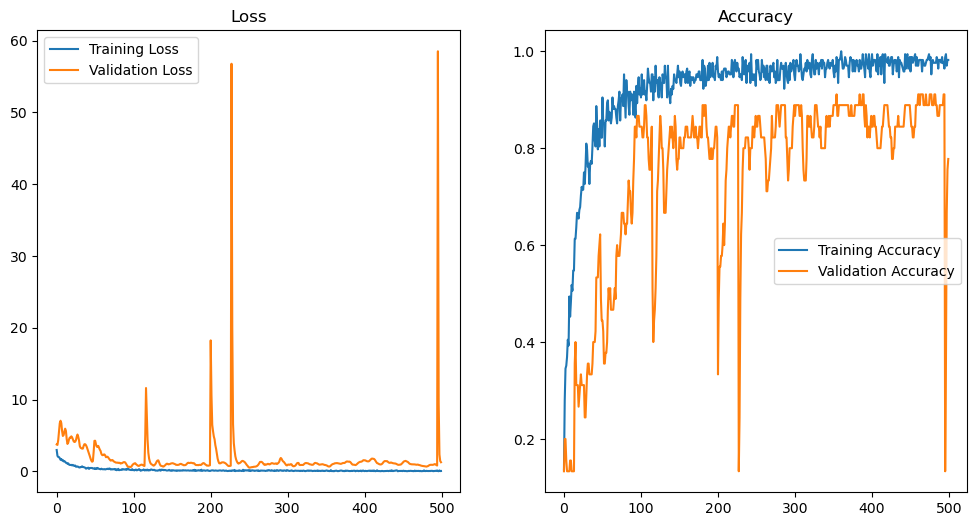

In [12]:
# Plotting training history
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()

In [13]:
#JAFFE RESENET----EXP2

Found 168 images belonging to 7 classes.
Found 45 images belonging to 7 classes.
Train and Validation sets have been created.
CNN model has been created you can proceed to train you data with this model.


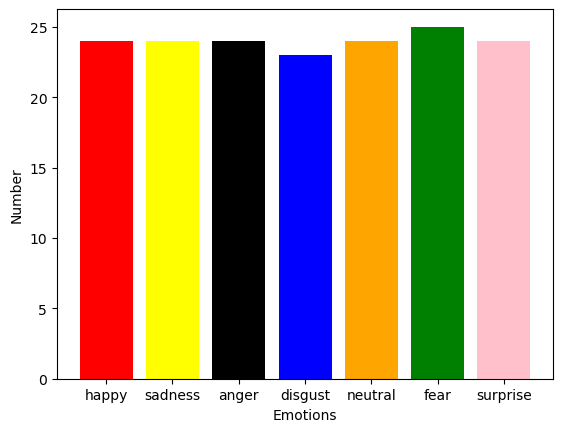

In [14]:
import tensorflow
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
from tensorflow.keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import tensorflow as tf
# Importing Deep Learning Libraries
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model
from keras import regularizers
from keras.preprocessing import image

#HISTOGRAM CODE
#histogram code
import matplotlib.pyplot as plt
import os

emotions = ["happy", "sadness", "anger", "disgust", "neutral", "fear", "surprise"]

folder_path = "Jaffetrainvalidation/train"
# Counting the number of images per emotion
counts = [len(os.listdir(os.path.join(folder_path, emotion))) for emotion in emotions]

# Plotting the bar chart
colors = ['red', 'yellow', 'black', 'blue', 'orange', 'green', 'pink']
plt.bar(emotions, height=counts, color=colors)
plt.ylabel('Number')
plt.xlabel('Emotions')


#plt.savefig('hostgoarm.png')
#plt.show()


# Data generators
batch_size = 64

# Data augmentation for training set
datagen_train = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Normalization for validation set (no augmentation)
datagen_val = ImageDataGenerator(rescale=1./255)



train_ds = datagen_train.flow_from_directory("Jaffetrainvalidation/train",
                                             target_size=(256, 256),
                                             color_mode="rgb",
                                             batch_size=batch_size,
                                             class_mode='categorical',
                                             shuffle=True)

test_ds = datagen_val.flow_from_directory("Jaffetrainvalidation/validation",
                                         target_size=(256, 256),
                                         color_mode="rgb",
                                         batch_size=batch_size,
                                         class_mode='categorical',
                                         shuffle=False)
print('Train and Validation sets have been created.')


from keras.applications.resnet import ResNet152
conv_base = ResNet152(
    weights='imagenet',
    include_top = False,
    input_shape=(256,256,3)
)


#conv_base.summary()


model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.30))
# Second fully connected layer  
model.add(Dense(512,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.30))

model.add(Dense(7, activation='softmax'))

# model.summary()
# Visualize the model.
#plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

conv_base.trainable = False

model.compile(optimizer = Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

print('CNN model has been created you can proceed to train you data with this model.')





In [15]:

# Training the model
epochs = 500

history = model.fit(x=train_ds,
                    epochs=epochs,
                    validation_data=test_ds)

# Print training history
print(history.history)


Epoch 1/500
3/3 [==============================] - 12s 2s/step - loss: 3.0512 - accuracy: 0.1607 - val_loss: 11.3138 - val_accuracy: 0.1556
Epoch 2/500
3/3 [==============================] - 2s 490ms/step - loss: 2.5607 - accuracy: 0.2202 - val_loss: 18.3433 - val_accuracy: 0.1333
Epoch 3/500
3/3 [==============================] - 2s 661ms/step - loss: 2.5133 - accuracy: 0.2024 - val_loss: 21.0936 - val_accuracy: 0.1556
Epoch 4/500
3/3 [==============================] - 2s 656ms/step - loss: 2.3681 - accuracy: 0.2321 - val_loss: 20.7810 - val_accuracy: 0.1556
Epoch 5/500
3/3 [==============================] - 2s 501ms/step - loss: 2.3517 - accuracy: 0.1905 - val_loss: 16.9529 - val_accuracy: 0.1556
Epoch 6/500
3/3 [==============================] - 2s 651ms/step - loss: 2.0551 - accuracy: 0.2798 - val_loss: 12.3499 - val_accuracy: 0.1556
Epoch 7/500
3/3 [==============================] - 2s 512ms/step - loss: 2.1038 - accuracy: 0.2917 - val_loss: 11.5115 - val_accuracy: 0.1556
Epoch 8/

Epoch 116/500
3/3 [==============================] - 2s 658ms/step - loss: 0.8795 - accuracy: 0.6667 - val_loss: 1.8169 - val_accuracy: 0.4889
Epoch 117/500
3/3 [==============================] - 2s 484ms/step - loss: 0.9339 - accuracy: 0.6667 - val_loss: 1.5906 - val_accuracy: 0.4222
Epoch 118/500
3/3 [==============================] - 2s 648ms/step - loss: 0.8553 - accuracy: 0.6548 - val_loss: 1.3007 - val_accuracy: 0.5556
Epoch 119/500
3/3 [==============================] - 2s 485ms/step - loss: 0.8462 - accuracy: 0.6667 - val_loss: 1.6965 - val_accuracy: 0.4222
Epoch 120/500
3/3 [==============================] - 2s 485ms/step - loss: 0.9243 - accuracy: 0.6429 - val_loss: 2.8944 - val_accuracy: 0.3111
Epoch 121/500
3/3 [==============================] - 2s 491ms/step - loss: 0.8103 - accuracy: 0.6786 - val_loss: 3.6465 - val_accuracy: 0.2889
Epoch 122/500
3/3 [==============================] - 2s 650ms/step - loss: 0.8593 - accuracy: 0.7083 - val_loss: 3.0005 - val_accuracy: 0.2889

3/3 [==============================] - 2s 498ms/step - loss: 0.6304 - accuracy: 0.7619 - val_loss: 3.0432 - val_accuracy: 0.3778
Epoch 231/500
3/3 [==============================] - 2s 513ms/step - loss: 0.6913 - accuracy: 0.7500 - val_loss: 2.8977 - val_accuracy: 0.4222
Epoch 232/500
3/3 [==============================] - 2s 649ms/step - loss: 0.5945 - accuracy: 0.7738 - val_loss: 3.8679 - val_accuracy: 0.2889
Epoch 233/500
3/3 [==============================] - 2s 504ms/step - loss: 0.7410 - accuracy: 0.7321 - val_loss: 5.2159 - val_accuracy: 0.2222
Epoch 234/500
3/3 [==============================] - 2s 492ms/step - loss: 0.7817 - accuracy: 0.7143 - val_loss: 4.8086 - val_accuracy: 0.2444
Epoch 235/500
3/3 [==============================] - 2s 486ms/step - loss: 0.6123 - accuracy: 0.7857 - val_loss: 2.9504 - val_accuracy: 0.4000
Epoch 236/500
3/3 [==============================] - 2s 500ms/step - loss: 0.4931 - accuracy: 0.8036 - val_loss: 2.2439 - val_accuracy: 0.5111
Epoch 237/500

3/3 [==============================] - 2s 503ms/step - loss: 0.6142 - accuracy: 0.7560 - val_loss: 1.5803 - val_accuracy: 0.5111
Epoch 345/500
3/3 [==============================] - 2s 643ms/step - loss: 0.6390 - accuracy: 0.7560 - val_loss: 1.4156 - val_accuracy: 0.4889
Epoch 346/500
3/3 [==============================] - 2s 491ms/step - loss: 0.5799 - accuracy: 0.7560 - val_loss: 1.2110 - val_accuracy: 0.4889
Epoch 347/500
3/3 [==============================] - 2s 508ms/step - loss: 0.4521 - accuracy: 0.8274 - val_loss: 1.4068 - val_accuracy: 0.5111
Epoch 348/500
3/3 [==============================] - 2s 488ms/step - loss: 0.4341 - accuracy: 0.8452 - val_loss: 1.5166 - val_accuracy: 0.5333
Epoch 349/500
3/3 [==============================] - 2s 650ms/step - loss: 0.5590 - accuracy: 0.7857 - val_loss: 1.3792 - val_accuracy: 0.6222
Epoch 350/500
3/3 [==============================] - 2s 488ms/step - loss: 0.5240 - accuracy: 0.8214 - val_loss: 1.1961 - val_accuracy: 0.6889
Epoch 351/500

3/3 [==============================] - 2s 510ms/step - loss: 0.3882 - accuracy: 0.8810 - val_loss: 1.8612 - val_accuracy: 0.6222
Epoch 459/500
3/3 [==============================] - 2s 490ms/step - loss: 0.4566 - accuracy: 0.8214 - val_loss: 1.4699 - val_accuracy: 0.7333
Epoch 460/500
3/3 [==============================] - 2s 491ms/step - loss: 0.3152 - accuracy: 0.9048 - val_loss: 1.1516 - val_accuracy: 0.8000
Epoch 461/500
3/3 [==============================] - 2s 504ms/step - loss: 0.4735 - accuracy: 0.8452 - val_loss: 1.1263 - val_accuracy: 0.6889
Epoch 462/500
3/3 [==============================] - 2s 490ms/step - loss: 0.4829 - accuracy: 0.8036 - val_loss: 1.4336 - val_accuracy: 0.5556
Epoch 463/500
3/3 [==============================] - 2s 657ms/step - loss: 0.4172 - accuracy: 0.8690 - val_loss: 1.2864 - val_accuracy: 0.6000
Epoch 464/500
3/3 [==============================] - 2s 504ms/step - loss: 0.4315 - accuracy: 0.8512 - val_loss: 1.0239 - val_accuracy: 0.6667
Epoch 465/500

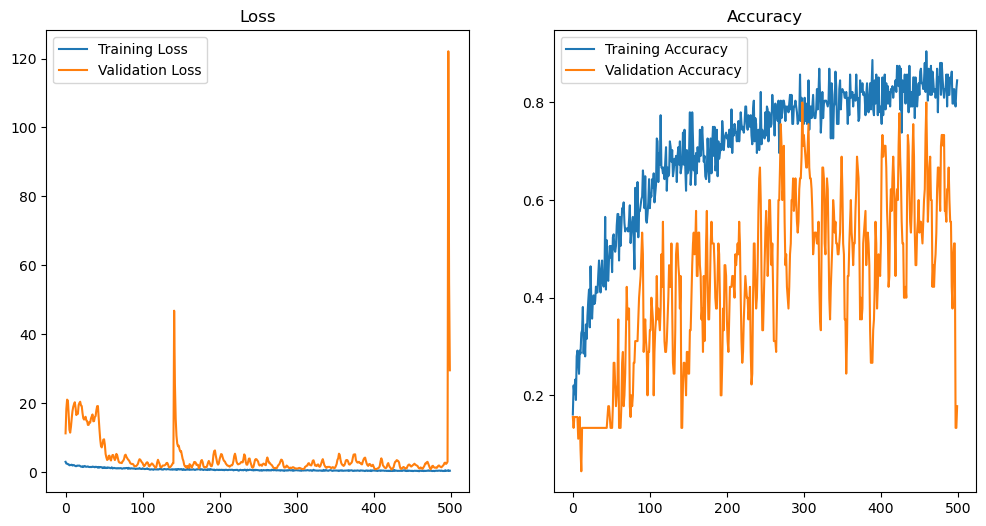

In [16]:

# Plotting training history
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()

In [17]:
#FER2013VGG19---EXP1

In [18]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import (Dense, Flatten, BatchNormalization, 
                                     Dropout, Conv2D, MaxPooling2D)
from tensorflow.keras.applications import VGG19
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import matplotlib.pyplot as plt
import numpy as np
import os


# Folder path for training images
folder_path = "images/train"  

# Image specifications
picture_size = 48  # Define picture size
batch_size = 128

# Data Generators with augmentation for training set
datagen_train = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Normalization for validation set (no augmentation)
datagen_val = ImageDataGenerator(rescale=1./255)

# Create training and validation data sets
train_set = datagen_train.flow_from_directory(
    folder_path,
    target_size=(picture_size, picture_size),  # Use picture_size variable
    color_mode="rgb",  # Ensure RGB input
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

# Corrected test set creation
test_set = datagen_val.flow_from_directory(
    "images/test",  # Added a comma at the end of this line
    target_size=(picture_size, picture_size),  # Use picture_size variable
    color_mode="rgb",  # Ensure RGB input
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

print('Train and Validation sets have been created.')

# Load the pre-trained VGG19 model
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

# Show the model summary
#base_model.summary()

# Create a Sequential model
model = Sequential()

# Add base model
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.30))
# Second fully connected layer  
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.30))
model.add(Dense(7, activation='softmax'))

# Set base model to not trainable
base_model.trainable = False

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
print('CNN model has been created, you can proceed to train your data with this model.')



Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
Train and Validation sets have been created.
CNN model has been created, you can proceed to train your data with this model.


In [19]:
# Training the model
epochs = 500

history = model.fit(
    train_set,
    epochs=epochs,
    validation_data=test_set
)

# Print training history
print(history.history)



Epoch 1/500
225/225 [==============================] - 19s 75ms/step - loss: 2.4397 - accuracy: 0.2006 - val_loss: 1.8162 - val_accuracy: 0.2994
Epoch 2/500
225/225 [==============================] - 15s 66ms/step - loss: 2.1575 - accuracy: 0.2469 - val_loss: 1.7516 - val_accuracy: 0.3330
Epoch 3/500
225/225 [==============================] - 15s 66ms/step - loss: 2.0522 - accuracy: 0.2614 - val_loss: 1.7173 - val_accuracy: 0.3356
Epoch 4/500
225/225 [==============================] - 15s 66ms/step - loss: 1.9991 - accuracy: 0.2697 - val_loss: 1.6898 - val_accuracy: 0.3452
Epoch 5/500
225/225 [==============================] - 15s 67ms/step - loss: 1.9402 - accuracy: 0.2782 - val_loss: 1.6698 - val_accuracy: 0.3473
Epoch 6/500
225/225 [==============================] - 15s 66ms/step - loss: 1.9069 - accuracy: 0.2818 - val_loss: 1.6496 - val_accuracy: 0.3518
Epoch 7/500
225/225 [==============================] - 15s 66ms/step - loss: 1.8721 - accuracy: 0.2938 - val_loss: 1.6515 - val_ac

225/225 [==============================] - 15s 66ms/step - loss: 1.5271 - accuracy: 0.3992 - val_loss: 1.4999 - val_accuracy: 0.4140
Epoch 114/500
225/225 [==============================] - 15s 66ms/step - loss: 1.5249 - accuracy: 0.4038 - val_loss: 1.5097 - val_accuracy: 0.4069
Epoch 115/500
225/225 [==============================] - 15s 66ms/step - loss: 1.5252 - accuracy: 0.4010 - val_loss: 1.5095 - val_accuracy: 0.4053
Epoch 116/500
225/225 [==============================] - 15s 66ms/step - loss: 1.5260 - accuracy: 0.4019 - val_loss: 1.5021 - val_accuracy: 0.4135
Epoch 117/500
225/225 [==============================] - 15s 67ms/step - loss: 1.5225 - accuracy: 0.4074 - val_loss: 1.5013 - val_accuracy: 0.4153
Epoch 118/500
225/225 [==============================] - 15s 66ms/step - loss: 1.5246 - accuracy: 0.4028 - val_loss: 1.5126 - val_accuracy: 0.4125
Epoch 119/500
225/225 [==============================] - 15s 66ms/step - loss: 1.5254 - accuracy: 0.4089 - val_loss: 1.5086 - val_ac

Epoch 169/500
225/225 [==============================] - 15s 66ms/step - loss: 1.4971 - accuracy: 0.4176 - val_loss: 1.4926 - val_accuracy: 0.4195
Epoch 170/500
225/225 [==============================] - 15s 66ms/step - loss: 1.4937 - accuracy: 0.4214 - val_loss: 1.4876 - val_accuracy: 0.4217
Epoch 171/500
225/225 [==============================] - 15s 67ms/step - loss: 1.4938 - accuracy: 0.4158 - val_loss: 1.4993 - val_accuracy: 0.4178
Epoch 172/500
225/225 [==============================] - 15s 66ms/step - loss: 1.4969 - accuracy: 0.4146 - val_loss: 1.4965 - val_accuracy: 0.4191
Epoch 173/500
225/225 [==============================] - 15s 67ms/step - loss: 1.5012 - accuracy: 0.4190 - val_loss: 1.4937 - val_accuracy: 0.4237
Epoch 174/500
225/225 [==============================] - 15s 67ms/step - loss: 1.5019 - accuracy: 0.4135 - val_loss: 1.4997 - val_accuracy: 0.4191
Epoch 175/500
225/225 [==============================] - 15s 66ms/step - loss: 1.4921 - accuracy: 0.4190 - val_loss: 1

Epoch 225/500
225/225 [==============================] - 30s 134ms/step - loss: 1.4750 - accuracy: 0.4252 - val_loss: 1.4946 - val_accuracy: 0.4216
Epoch 226/500
225/225 [==============================] - 28s 123ms/step - loss: 1.4714 - accuracy: 0.4268 - val_loss: 1.4928 - val_accuracy: 0.4259
Epoch 227/500
225/225 [==============================] - 53s 236ms/step - loss: 1.4696 - accuracy: 0.4297 - val_loss: 1.4913 - val_accuracy: 0.4273
Epoch 228/500
225/225 [==============================] - 29s 130ms/step - loss: 1.4711 - accuracy: 0.4263 - val_loss: 1.4941 - val_accuracy: 0.4257
Epoch 229/500
225/225 [==============================] - 36s 161ms/step - loss: 1.4743 - accuracy: 0.4274 - val_loss: 1.4944 - val_accuracy: 0.4319
Epoch 230/500
225/225 [==============================] - 37s 165ms/step - loss: 1.4781 - accuracy: 0.4234 - val_loss: 1.4992 - val_accuracy: 0.4210
Epoch 231/500
225/225 [==============================] - 31s 138ms/step - loss: 1.4674 - accuracy: 0.4324 - val_

Epoch 336/500
225/225 [==============================] - 15s 67ms/step - loss: 1.4447 - accuracy: 0.4395 - val_loss: 1.4942 - val_accuracy: 0.4312
Epoch 337/500
225/225 [==============================] - 15s 67ms/step - loss: 1.4433 - accuracy: 0.4402 - val_loss: 1.4855 - val_accuracy: 0.4348
Epoch 338/500
225/225 [==============================] - 15s 66ms/step - loss: 1.4479 - accuracy: 0.4382 - val_loss: 1.4931 - val_accuracy: 0.4280
Epoch 339/500
225/225 [==============================] - 15s 67ms/step - loss: 1.4420 - accuracy: 0.4400 - val_loss: 1.4898 - val_accuracy: 0.4283
Epoch 340/500
225/225 [==============================] - 15s 67ms/step - loss: 1.4412 - accuracy: 0.4408 - val_loss: 1.4962 - val_accuracy: 0.4270
Epoch 341/500
225/225 [==============================] - 15s 67ms/step - loss: 1.4402 - accuracy: 0.4417 - val_loss: 1.4953 - val_accuracy: 0.4334
Epoch 342/500
225/225 [==============================] - 15s 66ms/step - loss: 1.4458 - accuracy: 0.4362 - val_loss: 1

Epoch 392/500
225/225 [==============================] - 15s 67ms/step - loss: 1.4253 - accuracy: 0.4514 - val_loss: 1.4875 - val_accuracy: 0.4322
Epoch 393/500
225/225 [==============================] - 15s 66ms/step - loss: 1.4355 - accuracy: 0.4434 - val_loss: 1.4941 - val_accuracy: 0.4289
Epoch 394/500
225/225 [==============================] - 15s 67ms/step - loss: 1.4306 - accuracy: 0.4439 - val_loss: 1.4779 - val_accuracy: 0.4356
Epoch 395/500
225/225 [==============================] - 15s 67ms/step - loss: 1.4335 - accuracy: 0.4424 - val_loss: 1.4858 - val_accuracy: 0.4320
Epoch 396/500
225/225 [==============================] - 15s 66ms/step - loss: 1.4275 - accuracy: 0.4501 - val_loss: 1.4928 - val_accuracy: 0.4277
Epoch 397/500
225/225 [==============================] - 15s 67ms/step - loss: 1.4354 - accuracy: 0.4441 - val_loss: 1.4920 - val_accuracy: 0.4335
Epoch 398/500
225/225 [==============================] - 15s 67ms/step - loss: 1.4316 - accuracy: 0.4464 - val_loss: 1

Epoch 448/500
225/225 [==============================] - 15s 67ms/step - loss: 1.4241 - accuracy: 0.4478 - val_loss: 1.4753 - val_accuracy: 0.4342
Epoch 449/500
225/225 [==============================] - 15s 67ms/step - loss: 1.4310 - accuracy: 0.4477 - val_loss: 1.4856 - val_accuracy: 0.4352
Epoch 450/500
225/225 [==============================] - 15s 66ms/step - loss: 1.4220 - accuracy: 0.4507 - val_loss: 1.4913 - val_accuracy: 0.4324
Epoch 451/500
225/225 [==============================] - 15s 67ms/step - loss: 1.4228 - accuracy: 0.4510 - val_loss: 1.4827 - val_accuracy: 0.4349
Epoch 452/500
225/225 [==============================] - 15s 67ms/step - loss: 1.4230 - accuracy: 0.4493 - val_loss: 1.4831 - val_accuracy: 0.4376
Epoch 453/500
225/225 [==============================] - 15s 66ms/step - loss: 1.4219 - accuracy: 0.4512 - val_loss: 1.5016 - val_accuracy: 0.4301
Epoch 454/500
225/225 [==============================] - 15s 66ms/step - loss: 1.4241 - accuracy: 0.4503 - val_loss: 1

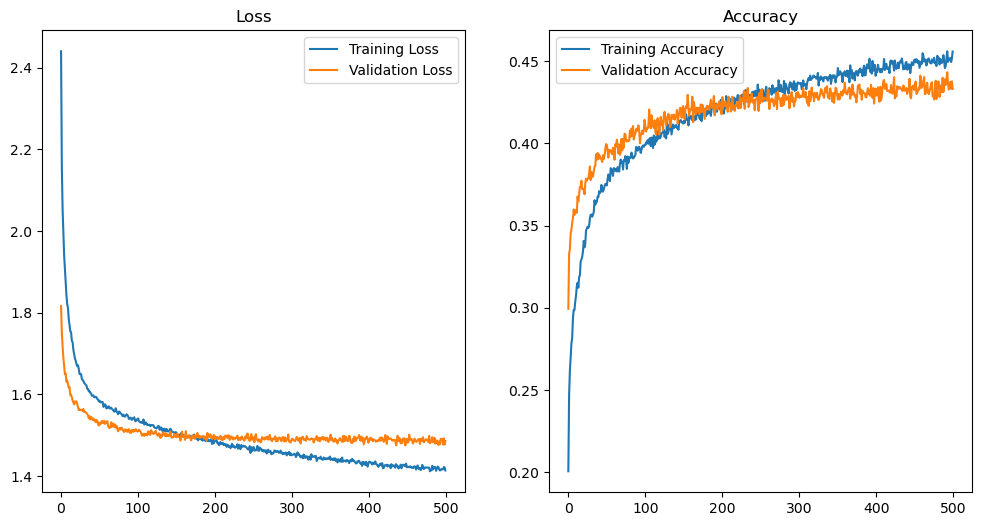

In [20]:
# Plotting training history
plt.figure(figsize=(12, 6))

# Loss Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

# Accuracy Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()

In [21]:
#ferresnet---EXP1

In [2]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import (Dense, Flatten, BatchNormalization, 
                                     Dropout, Conv2D, MaxPooling2D)
from tensorflow.keras.applications import VGG19
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import matplotlib.pyplot as plt
import numpy as np
import os


# Folder path for training images
folder_path = "images/train"  

# Image specifications
picture_size = 48  # Define picture size
batch_size = 128

# Data Generators with augmentation for training set
datagen_train = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Normalization for validation set (no augmentation)
datagen_val = ImageDataGenerator(rescale=1./255)

# Create training and validation data sets
train_set = datagen_train.flow_from_directory(
    folder_path,
    target_size=(picture_size, picture_size),  # Use picture_size variable
    color_mode="rgb",  # Ensure RGB input
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

# Corrected test set creation
test_set = datagen_val.flow_from_directory(
    "images/test",  # Added a comma at the end of this line
    target_size=(picture_size, picture_size),  # Use picture_size variable
    color_mode="rgb",  # Ensure RGB input
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

print('Train and Validation sets have been created.')



from keras.applications.resnet import ResNet152
base_model = ResNet152(
    weights='imagenet',
    include_top = False,
    input_shape=(48,48,3)
)

# Show the model summary
#base_model.summary()

# Create a Sequential model
model = Sequential()

# Add base model
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.30))
# Second fully connected layer  
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.30))
model.add(Dense(7, activation='softmax'))

# Set base model to not trainable
base_model.trainable = False

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
print('CNN model has been created, you can proceed to train your data with this model.')


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
Train and Validation sets have been created.
CNN model has been created, you can proceed to train your data with this model.


In [3]:

# Training the model
epochs = 500

history = model.fit(
    train_set,
    epochs=epochs,
    validation_data=test_set
)

# Print training history
print(history.history)



Epoch 1/500


2024-10-20 08:11:15.559911: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8905
2024-10-20 08:11:15.858518: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2024-10-20 08:11:16.407596: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x3337c5a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-10-20 08:11:16.407615: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3070 Laptop GPU, Compute Capability 8.6
2024-10-20 08:11:16.422877: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-10-20 08:11:16.562753: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime o

225/225 [==============================] - 27s 87ms/step - loss: 2.4115 - accuracy: 0.1792 - val_loss: 1.9063 - val_accuracy: 0.2552
Epoch 2/500
225/225 [==============================] - 16s 70ms/step - loss: 2.2216 - accuracy: 0.2068 - val_loss: 1.8793 - val_accuracy: 0.2412
Epoch 3/500
225/225 [==============================] - 16s 71ms/step - loss: 2.1393 - accuracy: 0.2177 - val_loss: 1.8941 - val_accuracy: 0.2648
Epoch 4/500
225/225 [==============================] - 16s 70ms/step - loss: 2.0754 - accuracy: 0.2289 - val_loss: 1.8483 - val_accuracy: 0.2724
Epoch 5/500
225/225 [==============================] - 16s 70ms/step - loss: 2.0344 - accuracy: 0.2387 - val_loss: 1.8118 - val_accuracy: 0.2594
Epoch 6/500
225/225 [==============================] - 16s 70ms/step - loss: 1.9991 - accuracy: 0.2444 - val_loss: 1.7770 - val_accuracy: 0.2849
Epoch 7/500
225/225 [==============================] - 16s 71ms/step - loss: 1.9829 - accuracy: 0.2452 - val_loss: 1.7640 - val_accuracy: 0.27

225/225 [==============================] - 16s 70ms/step - loss: 1.6750 - accuracy: 0.3348 - val_loss: 1.6763 - val_accuracy: 0.3504
Epoch 58/500
225/225 [==============================] - 16s 70ms/step - loss: 1.6773 - accuracy: 0.3331 - val_loss: 1.7675 - val_accuracy: 0.2959
Epoch 59/500
225/225 [==============================] - 16s 71ms/step - loss: 1.6798 - accuracy: 0.3357 - val_loss: 1.7687 - val_accuracy: 0.3282
Epoch 60/500
225/225 [==============================] - 16s 71ms/step - loss: 1.6717 - accuracy: 0.3383 - val_loss: 1.8152 - val_accuracy: 0.2703
Epoch 61/500
225/225 [==============================] - 16s 70ms/step - loss: 1.6791 - accuracy: 0.3327 - val_loss: 1.6558 - val_accuracy: 0.3348
Epoch 62/500
225/225 [==============================] - 16s 70ms/step - loss: 1.6710 - accuracy: 0.3413 - val_loss: 1.6439 - val_accuracy: 0.3484
Epoch 63/500
225/225 [==============================] - 16s 70ms/step - loss: 1.6739 - accuracy: 0.3355 - val_loss: 1.7060 - val_accuracy

225/225 [==============================] - 16s 71ms/step - loss: 1.6474 - accuracy: 0.3495 - val_loss: 1.5898 - val_accuracy: 0.3752
Epoch 114/500
225/225 [==============================] - 16s 71ms/step - loss: 1.6454 - accuracy: 0.3517 - val_loss: 1.9917 - val_accuracy: 0.2006
Epoch 115/500
225/225 [==============================] - 16s 71ms/step - loss: 1.6458 - accuracy: 0.3500 - val_loss: 1.8005 - val_accuracy: 0.3075
Epoch 116/500
225/225 [==============================] - 16s 71ms/step - loss: 1.6397 - accuracy: 0.3541 - val_loss: 1.9434 - val_accuracy: 0.3119
Epoch 117/500
225/225 [==============================] - 16s 70ms/step - loss: 1.6418 - accuracy: 0.3510 - val_loss: 1.6918 - val_accuracy: 0.3405
Epoch 118/500
225/225 [==============================] - 16s 71ms/step - loss: 1.6440 - accuracy: 0.3491 - val_loss: 1.6536 - val_accuracy: 0.3551
Epoch 119/500
225/225 [==============================] - 16s 70ms/step - loss: 1.6432 - accuracy: 0.3513 - val_loss: 1.6024 - val_ac

Epoch 169/500
225/225 [==============================] - 16s 71ms/step - loss: 1.6271 - accuracy: 0.3559 - val_loss: 1.7137 - val_accuracy: 0.3348
Epoch 170/500
225/225 [==============================] - 16s 71ms/step - loss: 1.6302 - accuracy: 0.3570 - val_loss: 1.5927 - val_accuracy: 0.3711
Epoch 171/500
225/225 [==============================] - 16s 70ms/step - loss: 1.6273 - accuracy: 0.3597 - val_loss: 1.9383 - val_accuracy: 0.2774
Epoch 172/500
225/225 [==============================] - 16s 71ms/step - loss: 1.6276 - accuracy: 0.3586 - val_loss: 1.6351 - val_accuracy: 0.3504
Epoch 173/500
225/225 [==============================] - 16s 70ms/step - loss: 1.6223 - accuracy: 0.3599 - val_loss: 1.7426 - val_accuracy: 0.2977
Epoch 174/500
225/225 [==============================] - 16s 70ms/step - loss: 1.6304 - accuracy: 0.3570 - val_loss: 1.6114 - val_accuracy: 0.3814
Epoch 175/500
225/225 [==============================] - 16s 70ms/step - loss: 1.6286 - accuracy: 0.3599 - val_loss: 1

Epoch 225/500
225/225 [==============================] - 16s 71ms/step - loss: 1.6163 - accuracy: 0.3639 - val_loss: 1.5912 - val_accuracy: 0.3767
Epoch 226/500
225/225 [==============================] - 16s 71ms/step - loss: 1.6099 - accuracy: 0.3702 - val_loss: 1.6395 - val_accuracy: 0.3505
Epoch 227/500
225/225 [==============================] - 16s 70ms/step - loss: 1.6159 - accuracy: 0.3667 - val_loss: 1.5373 - val_accuracy: 0.3997
Epoch 228/500
225/225 [==============================] - 16s 70ms/step - loss: 1.6133 - accuracy: 0.3661 - val_loss: 1.8343 - val_accuracy: 0.3338
Epoch 229/500
225/225 [==============================] - 16s 71ms/step - loss: 1.6191 - accuracy: 0.3619 - val_loss: 1.5757 - val_accuracy: 0.3805
Epoch 230/500
225/225 [==============================] - 16s 70ms/step - loss: 1.6144 - accuracy: 0.3645 - val_loss: 1.5797 - val_accuracy: 0.3763
Epoch 231/500
225/225 [==============================] - 16s 71ms/step - loss: 1.6172 - accuracy: 0.3665 - val_loss: 1

Epoch 281/500
225/225 [==============================] - 16s 71ms/step - loss: 1.6075 - accuracy: 0.3688 - val_loss: 1.6564 - val_accuracy: 0.3480
Epoch 282/500
225/225 [==============================] - 16s 71ms/step - loss: 1.6118 - accuracy: 0.3684 - val_loss: 1.5950 - val_accuracy: 0.3640
Epoch 283/500
225/225 [==============================] - 16s 71ms/step - loss: 1.6083 - accuracy: 0.3669 - val_loss: 1.5912 - val_accuracy: 0.3782
Epoch 284/500
225/225 [==============================] - 16s 70ms/step - loss: 1.6078 - accuracy: 0.3665 - val_loss: 1.5572 - val_accuracy: 0.3866
Epoch 285/500
225/225 [==============================] - 16s 71ms/step - loss: 1.6074 - accuracy: 0.3679 - val_loss: 1.5781 - val_accuracy: 0.3874
Epoch 286/500
225/225 [==============================] - 16s 70ms/step - loss: 1.6114 - accuracy: 0.3650 - val_loss: 1.5917 - val_accuracy: 0.3803
Epoch 287/500
225/225 [==============================] - 16s 71ms/step - loss: 1.6070 - accuracy: 0.3674 - val_loss: 1

Epoch 337/500
225/225 [==============================] - 16s 71ms/step - loss: 1.6021 - accuracy: 0.3716 - val_loss: 1.5931 - val_accuracy: 0.3773
Epoch 338/500
225/225 [==============================] - 16s 71ms/step - loss: 1.5977 - accuracy: 0.3773 - val_loss: 1.9214 - val_accuracy: 0.2726
Epoch 339/500
225/225 [==============================] - 16s 71ms/step - loss: 1.5943 - accuracy: 0.3744 - val_loss: 1.7839 - val_accuracy: 0.3176
Epoch 340/500
225/225 [==============================] - 16s 71ms/step - loss: 1.5988 - accuracy: 0.3717 - val_loss: 1.6013 - val_accuracy: 0.3663
Epoch 341/500
225/225 [==============================] - 16s 70ms/step - loss: 1.5994 - accuracy: 0.3757 - val_loss: 1.6386 - val_accuracy: 0.3596
Epoch 342/500
225/225 [==============================] - 16s 71ms/step - loss: 1.6012 - accuracy: 0.3732 - val_loss: 1.5963 - val_accuracy: 0.3760
Epoch 343/500
225/225 [==============================] - 16s 71ms/step - loss: 1.6036 - accuracy: 0.3725 - val_loss: 1

Epoch 393/500
225/225 [==============================] - 16s 71ms/step - loss: 1.5932 - accuracy: 0.3729 - val_loss: 1.8404 - val_accuracy: 0.3174
Epoch 394/500
225/225 [==============================] - 16s 70ms/step - loss: 1.5909 - accuracy: 0.3755 - val_loss: 1.5531 - val_accuracy: 0.3936
Epoch 395/500
225/225 [==============================] - 16s 71ms/step - loss: 1.6000 - accuracy: 0.3728 - val_loss: 1.6791 - val_accuracy: 0.3539
Epoch 396/500
225/225 [==============================] - 16s 70ms/step - loss: 1.6010 - accuracy: 0.3718 - val_loss: 1.5422 - val_accuracy: 0.3863
Epoch 397/500
225/225 [==============================] - 16s 71ms/step - loss: 1.5962 - accuracy: 0.3746 - val_loss: 2.0786 - val_accuracy: 0.3098
Epoch 398/500
225/225 [==============================] - 16s 71ms/step - loss: 1.5987 - accuracy: 0.3752 - val_loss: 1.5633 - val_accuracy: 0.3859
Epoch 399/500
225/225 [==============================] - 16s 71ms/step - loss: 1.5948 - accuracy: 0.3760 - val_loss: 1

Epoch 449/500
225/225 [==============================] - 16s 70ms/step - loss: 1.5954 - accuracy: 0.3748 - val_loss: 1.6661 - val_accuracy: 0.3360
Epoch 450/500
225/225 [==============================] - 16s 71ms/step - loss: 1.5953 - accuracy: 0.3733 - val_loss: 1.7359 - val_accuracy: 0.3537
Epoch 451/500
225/225 [==============================] - 16s 71ms/step - loss: 1.5906 - accuracy: 0.3763 - val_loss: 1.5578 - val_accuracy: 0.3920
Epoch 452/500
225/225 [==============================] - 16s 70ms/step - loss: 1.5958 - accuracy: 0.3750 - val_loss: 1.5786 - val_accuracy: 0.3785
Epoch 453/500
225/225 [==============================] - 16s 71ms/step - loss: 1.5934 - accuracy: 0.3804 - val_loss: 1.6708 - val_accuracy: 0.3472
Epoch 454/500
225/225 [==============================] - 16s 71ms/step - loss: 1.5867 - accuracy: 0.3804 - val_loss: 1.5780 - val_accuracy: 0.3936
Epoch 455/500
225/225 [==============================] - 16s 71ms/step - loss: 1.5914 - accuracy: 0.3747 - val_loss: 1

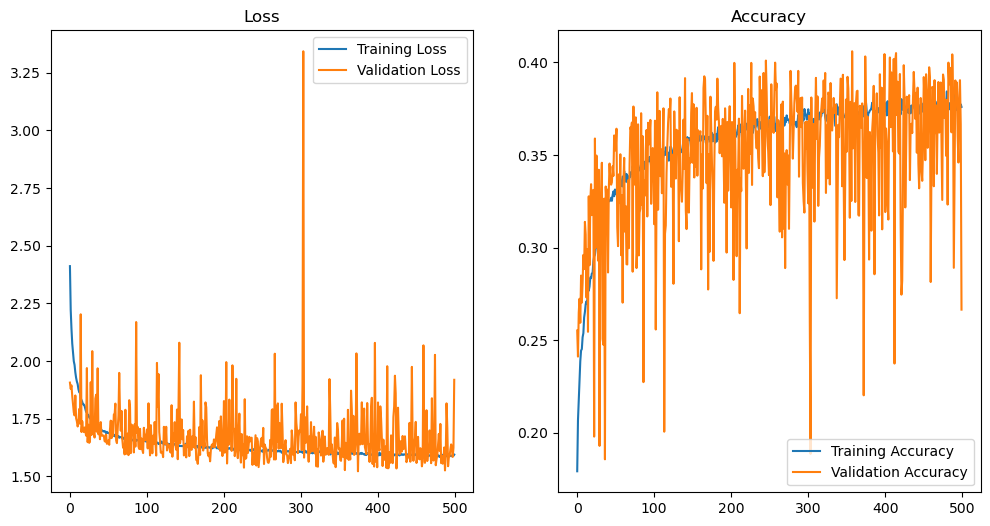

In [4]:
# Plotting training history
plt.figure(figsize=(12, 6))

# Loss Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

# Accuracy Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()